In [1]:
from glob import glob
from PIL import Image, ImageFilter
import cv2
from skimage import io, util
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import random
import numpy as np
import pytesseract
from pdf2image import convert_from_path
import imgaug as ia
from imgaug import augmenters as iaa

In [2]:
pages = convert_from_path('processo.pdf', dpi=200, output_folder='.', fmt='jpg', size=(800, None), grayscale=True)

In [112]:
paths = glob('*.jpg')
print(paths)
random_path = random.choice(paths)

# getting image
image = cv2.imread(random_path)
height, width, channels = image.shape

['64592059-c768-4c4d-ae93-88b539aaf8e8-3.jpg', '64592059-c768-4c4d-ae93-88b539aaf8e8-2.jpg', 'a6219c52-ebba-4312-be3d-e65b8dc7a6d8-3.jpg', '76653a3a-1135-401c-8507-7c673a96a704-2.jpg', 'a6219c52-ebba-4312-be3d-e65b8dc7a6d8-2.jpg', 'a6219c52-ebba-4312-be3d-e65b8dc7a6d8-1.jpg', '64592059-c768-4c4d-ae93-88b539aaf8e8-1.jpg', '76653a3a-1135-401c-8507-7c673a96a704-1.jpg', '76653a3a-1135-401c-8507-7c673a96a704-3.jpg']


In [121]:
def random_overlay(shape, color=(55, 55, 55)):
    import random
    import cv2
    # get image shape
    height, width, channels = image.shape

    # create blank white image
    overlay = 255 * np.ones(shape=[height, width, channels], dtype=np.uint8)
    
    # randomize crappy shape and position
    ## 0 - rectangle
    ## 1 - line
    ## 2 - circle
    for i in range(3):
        # get randomic shape position
        x1, y1 = [random.choice(range(0, width)), random.choice(range(0, height))]
        x2, y2 = [random.choice(range(0, width)), random.choice(range(0, height))]
        
        # select random shape
        shape_range = range(0, 2)
        randomic_shape = random.choice(shape_range)
        if randomic_shape == 0:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), color, -1)
        elif randomic_shape == 1:
            cv2.line(overlay, (x1, y1), (x2, y2), color, 80)        
        else:
            cv2.circle(overlay, (x1, y1), (x2, y2), color, -1)
    overlay = cv2.blur(overlay, (100, 100))
    return overlay

overlay = random_overlay(image.shape)

In [122]:
alpha = 0.6
new_image = cv2.addWeighted(image, alpha, overlay, 1 - alpha, 0)

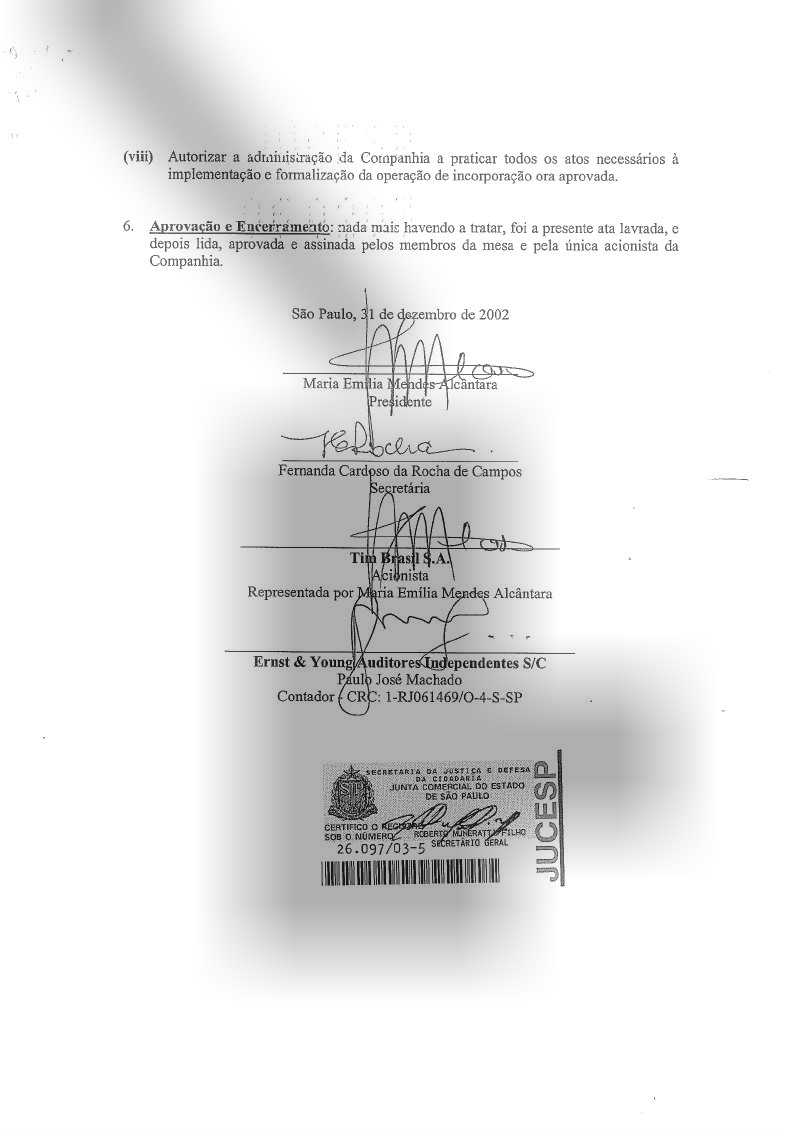

In [123]:
Image.fromarray(new_image)

In [65]:
# res = pytesseract.image_to_string(image)
# print(len(res.split('\n')))
# res.split('\n')

In [66]:
# res = pytesseract.image_to_string(new_image)
# print(len(res.split('\n')))
# res.split('\n')

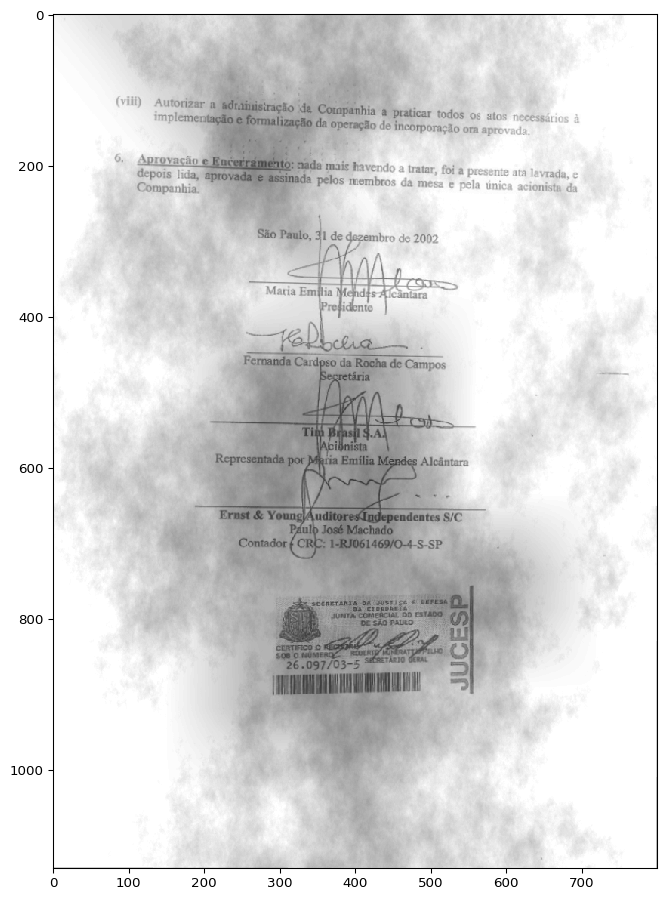

In [131]:
seq = iaa.Sequential([
    iaa.PerspectiveTransform(random_state=1, scale=0.05),
    iaa.Fog(),
    iaa.Affine(rotate=0.01),
    iaa.GammaContrast(3)
])

c = seq.augment_image(new_image)
ia.imshow(c)

In [141]:
pytesseract.image_to_string(image)

'(viii) Autorizar a adtainisiragio da Cotapanhia a praticar todos os atos necessétios 4\n\nimplementagdo e formalizagao da operago de incorporago ora aprovada.\n\n6. Aprovacio e Encerrdmento: ada mais havendo a tratar, foi a presente ata lavrada,\ndepois lida, aprovada e assinada pelos membros da mesa ¢ pela tinica acionista da\nCompankia.\n\nembro de 2002\n\n \n\nfeantara\n\n \n\nFernanda Cardpso da Rocha de Campos\nBegretiria\n\n \n\n \n\nene ee\n\nreson Oh\noO\nSega LE oO\n\n26.097/03-5 *\n\n{AGC\n\nee\na\n\n5'

In [142]:
pytesseract.image_to_string(c)

'vendo a tratar, foi a presente ata levrada, ¢\nTMembros da mese € pela tinica acionista da'